In [27]:
%matplotlib inline

import numpy as np
import skimage
from skimage import data
from skimage import io
import os
import glob
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage import filters
from skimage.color import rgb2gray

## Open photos

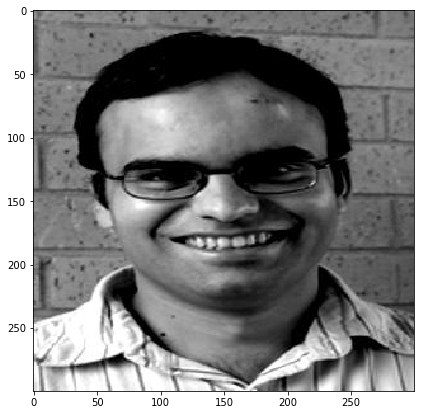

In [23]:
filename = os.path.join('faces/', '1.jpg')
camera = io.imread(filename)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, adjustable='box-forced')

ax.imshow(camera, cmap=plt.cm.gray)
plt.show()

In [10]:
print camera

[[127 127 124 ..., 117 116 115]
 [136 133 123 ..., 117 117 117]
 [143 141 129 ..., 115 117 119]
 ..., 
 [218 218 223 ..., 199 203 210]
 [219 219 225 ..., 200 204 211]
 [220 221 228 ..., 201 205 212]]


In [5]:
def as_gray(image_filter, image, *args, **kwargs):
    gray_image = rgb2gray(image)
    return image_filter(gray_image, *args, **kwargs)

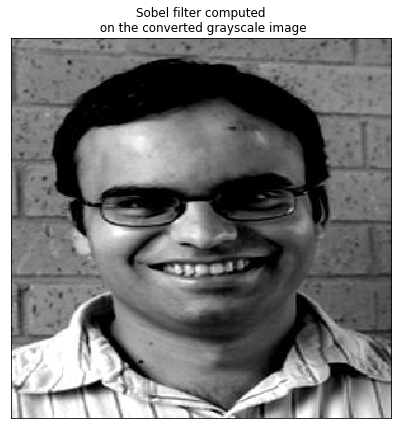

In [23]:
@adapt_rgb(as_gray)

def sobel_gray(image):
    return filters.sobel(image)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, sharex=ax_each, sharey=ax_each,
                     adjustable='box-forced')

# We use 1 - sobel_gray(image)
# but this will not work if image is not normalized
ax.imshow(image, cmap=plt.cm.gray)
ax.set_xticks([]), ax.set_yticks([])
ax.set_title("Sobel filter computed\n on the converted grayscale image")

plt.show()

## Open images in a directory

In [19]:
image_list = []
for filename in glob.glob('faces/*.jpg'): # Unix style pathname pattern expansion
    im=io.imread(filename)
    image_list.append(im)

## View images

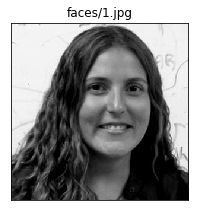

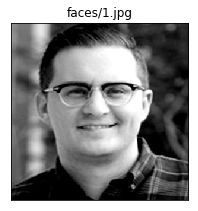

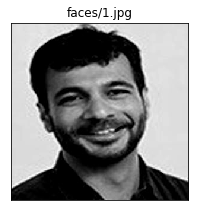

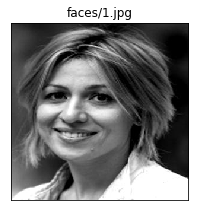

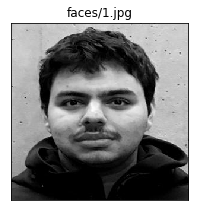

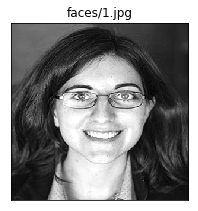

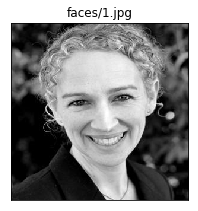

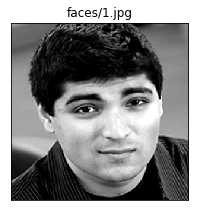

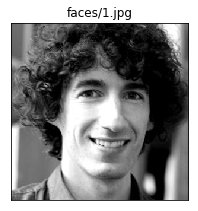

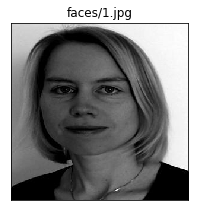

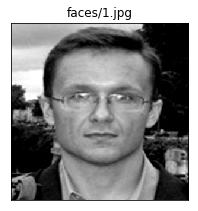

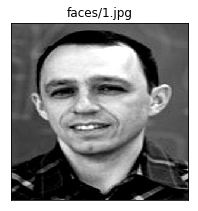

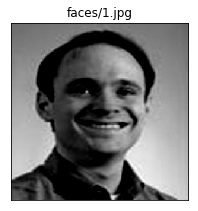

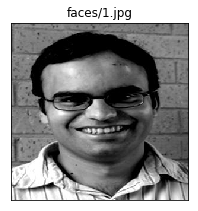

In [20]:
for im in image_list:
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(121, adjustable='box-forced')
    
    ax.imshow(im, cmap=plt.cm.gray)
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title(filename)
    
    #plt.show()

## Normalise images

In [38]:
um = 100
ustd = 80

normalise_list = []

for i in image_list:
    temp = i
    m = np.mean(temp)
    st = np.std(temp)
    A = (temp-m)*ustd/st+um
    normalise_list.append(A)

## View images

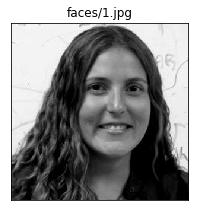

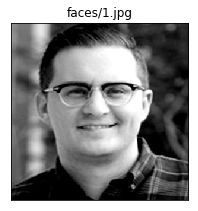

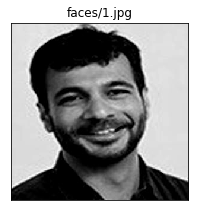

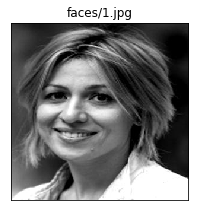

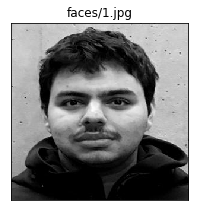

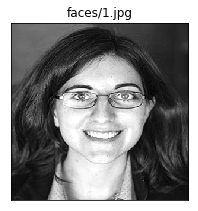

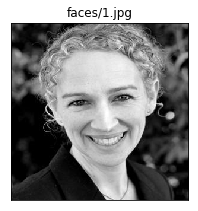

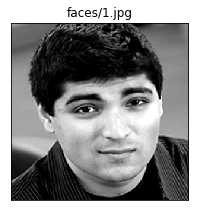

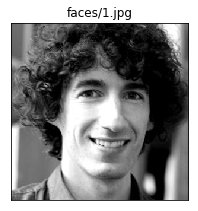

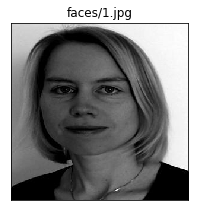

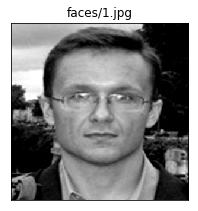

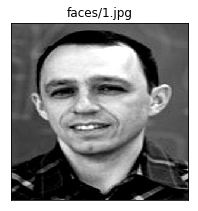

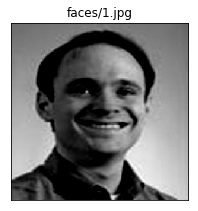

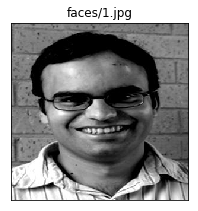

In [39]:
for im in normalise_list:
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(121, adjustable='box-forced')
    
    ax.imshow(im, cmap=plt.cm.gray)
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title(filename)

In [50]:
normalise_list[1]

array([[ 150.50060428,  148.36946387,  144.10718305, ...,   38.61573268,
          37.55016247,   36.48459226],
       [ 150.50060428,  148.36946387,  144.10718305, ...,   38.61573268,
          37.55016247,   36.48459226],
       [ 150.50060428,  148.36946387,  144.10718305, ...,   38.61573268,
          36.48459226,   35.41902206],
       ..., 
       [  -4.00707555,   -4.00707555,   -2.94150535, ...,   50.33700494,
          51.40257514,   48.20586453],
       [  -2.94150535,   -1.87593514,    1.32077547, ...,   52.46814535,
          50.33700494,   41.81244329],
       [  -5.07264576,   -4.00707555,   -1.87593514, ...,   54.59928576,
          49.27143473,   36.48459226]])

## another normalised method

In [59]:
newMax = 255
newMin = 0

normalise_list2 = []
for i in image_list:
    mi = np.amin(i)
    mx = np.amax(i)
    
    temp = (newMax - newMin)/(mx - mi)
    
    A = (i-mi)*temp+newMin
    normalise_list2.append(A)
    
print normalise_list2[1]
print image_list[1]

[[150 148 144 ...,  45  44  43]
 [150 148 144 ...,  45  44  43]
 [150 148 144 ...,  45  43  42]
 ..., 
 [  5   5   6 ...,  56  57  54]
 [  6   7  10 ...,  58  56  48]
 [  4   5   7 ...,  60  55  43]]
[[150 148 144 ...,  45  44  43]
 [150 148 144 ...,  45  44  43]
 [150 148 144 ...,  45  43  42]
 ..., 
 [  5   5   6 ...,  56  57  54]
 [  6   7  10 ...,  58  56  48]
 [  4   5   7 ...,  60  55  43]]


## view images 2

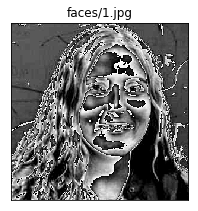

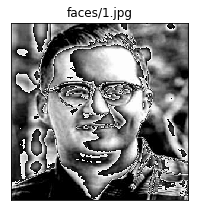

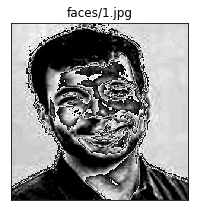

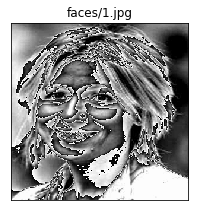

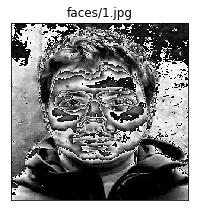

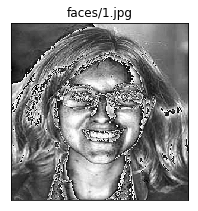

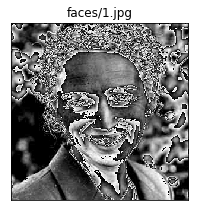

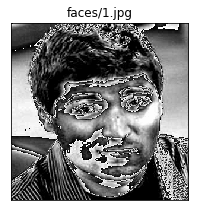

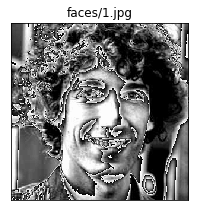

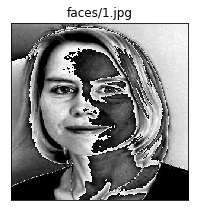

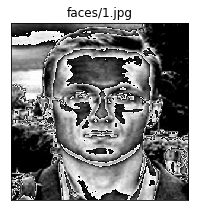

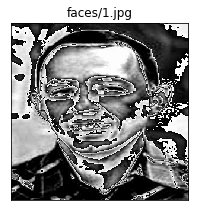

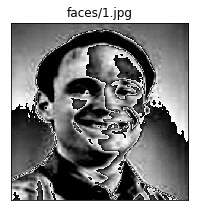

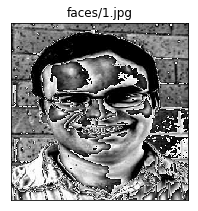

In [58]:
for im in normalise_list2:
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(121, adjustable='box-forced')
    
    ax.imshow(im, cmap=plt.cm.gray)
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title(filename)

## Compute the mean of an image

In [60]:
np.mean(image_list[1], axis=(0,1))

102.60696666666666